# Exploratory Data Analysis (EDA)
## 1)  DATA LOADING & CLEANING
### 1.1) 

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "9" 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [2]:
dataset = pd.read_csv("Obesity.csv")
display(dataset.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
display(dataset.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
print(f"\n Il dataset contiene {dataset.shape[0]} osservazioni e {dataset.shape[1]} variabili.\n")


 Il dataset contiene 2114 osservazioni e 17 variabili.



In [5]:
dataset.rename(columns={"FAVC": "High_Caloric_Food", 
                        "FCVC": "Vegetable_Consumption", 
                        "NCP": "Main_Meals_Per_Day", 
                        "CAEC": "Food_Between_Meals", 
                        "CH2O": "Water_Intake", 
                        "SCC": "Calorie_Monitoring", 
                        "FAF": "Physical_Activity_Frequency", 
                        "TUE": "Tech_use_Time", 
                        "CALC": "Alcohol_Consumption", 
                        "MTRANS": "Transport_Mode", 
                        "NObeyesdad": "Obesity_Level",}, inplace=True)
dataset["Height"] *= 100
cols_discrete = ["Age", "Height", "Weight", "Vegetable_Consumption", "Main_Meals_Per_Day", "Water_Intake", "Physical_Activity_Frequency", "Tech_use_Time"]
dataset[cols_discrete] = dataset[cols_discrete].round().astype(int)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,Vegetable_Consumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Transport_Mode,Obesity_Level
0,Female,21,162,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,152,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,180,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,180,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,178,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,Female,21,171,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,22,175,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2111,Female,23,175,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2112,Female,24,174,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
print("\nValori Mancanti per ogni variabile\n")
missing_values = dataset.isna().sum()
missing_values


Valori Mancanti per ogni variabile



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               5
Transport_Mode                    0
Obesity_Level                     1
dtype: int64

In [7]:
missing_values_percent = (missing_values/len(dataset))*100
missing_values_table = pd.DataFrame({"Valori Mancanti": missing_values, "% del totale": missing_values_percent})
display(missing_values_table[missing_values_table["Valori Mancanti"] > 0])

print(f"\n Valori mancanti Consumo Alcolici\n")
dataset[dataset["Alcohol_Consumption"].isna()] 

,Valori Mancanti,% del totale
Alcohol_Consumption,5,0.236518
Obesity_Level,1,0.047304



 Valori mancanti Consumo Alcolici



,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,Vegetable_Consumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Transport_Mode,Obesity_Level
13,Male,41,180,99,no,yes,2,3,Sometimes,no,2,no,2,1,NaN,Automobile,Obesity_Type_I
94,Female,24,160,48,no,yes,3,3,Sometimes,no,2,no,2,0,NaN,Public_Transportation,Normal_Weight
162,Female,21,163,60,yes,yes,3,3,Always,yes,2,no,2,0,NaN,Public_Transportation,Normal_Weight
278,Female,32,157,57,yes,yes,3,3,Sometimes,no,2,no,0,0,NaN,Automobile,Normal_Weight
463,Male,17,180,68,yes,no,2,3,Sometimes,no,1,no,2,1,NaN,Public_Transportation,Normal_Weight


In [8]:
print(f"\n Valori mancanti livello Obesità\n")
dataset[dataset["Obesity_Level"].isna()] 


 Valori mancanti livello Obesità



,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,Vegetable_Consumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Transport_Mode,Obesity_Level
376,Female,36,158,60,yes,no,3,3,Sometimes,no,1,no,2,0,Sometimes,Automobile,NaN


In [9]:
print("\nGestione valori mancanti\n")
#da scegliere tra due strategie: rimozione (dataset.dropna()) o imputazione (dataset.fillna(value)) 
#nel primo caso eliminiamo tutte le righe che presentano dei valori mancanti (adatto quando ci sono pochi valori mancanti)
#nel secondo caso sostituiamo i valori mancanti con un valore (es: media, mediana, ecc...) (adatto quando non si vogliono perdere dati ed è possibile stimare il valori mancanti)
dataset_clean = dataset.dropna()
missing_values = dataset_clean.isna().sum()
missing_values


Gestione valori mancanti



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64

In [10]:
print("\nUnivariate Data Description \n")

var_numeriche = dataset_clean.select_dtypes(include=["int64", "float64"]).columns
var_categoriche = dataset_clean.select_dtypes(exclude=["int64", "float64"]).columns
print(f"\n Variabili numeriche: {list(var_numeriche)} \n")
print(f"\n Variabili categoriche: {list(var_categoriche)} \n")




Univariate Data Description 


 Variabili numeriche: ['Age', 'Height', 'Weight', 'Vegetable_Consumption', 'Main_Meals_Per_Day', 'Water_Intake', 'Physical_Activity_Frequency', 'Tech_use_Time'] 


 Variabili categoriche: ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'Food_Between_Meals', 'SMOKE', 'Calorie_Monitoring', 'Alcohol_Consumption', 'Transport_Mode', 'Obesity_Level'] 



In [11]:
print("\nDescriptive Statistic: \n")
stats = dataset_clean.describe()
stats.rename(index={'50%': 'median'}, inplace=True)
display(stats)


Descriptive Statistic: 



,Age,Height,Weight,Vegetable_Consumption,Main_Meals_Per_Day,Water_Intake,Physical_Activity_Frequency,Tech_use_Time
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000
mean,24.300759,170.174099,86.610057,2.421727,2.687856,2.015180,1.005218,0.666034
std,6.343487,9.329162,26.195058,0.585412,0.810646,0.688751,0.895314,0.673904
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,163.000000,66.000000,2.000000,3.000000,2.000000,0.000000,0.000000
median,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,177.000000,107.250000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
print("\n Tabelle di frequenza: \n")
for var in var_categoriche:
   
    print(dataset_clean[var].value_counts())
    print("-" * 40)
    print("\n")


 Tabelle di frequenza: 

Gender
Male      1067
Female    1041
Name: count, dtype: int64
----------------------------------------


family_history_with_overweight
yes    1722
no      386
Name: count, dtype: int64
----------------------------------------


High_Caloric_Food
yes    1864
no      244
Name: count, dtype: int64
----------------------------------------


Food_Between_Meals
Sometimes     1763
Frequently     242
Always          52
no              51
Name: count, dtype: int64
----------------------------------------


SMOKE
no     2065
yes      43
Name: count, dtype: int64
----------------------------------------


Calorie_Monitoring
no     2012
yes      96
Name: count, dtype: int64
----------------------------------------


Alcohol_Consumption
Sometimes     1399
no             639
Frequently      69
Always           1
Name: count, dtype: int64
----------------------------------------


Transport_Mode
Public_Transportation    1579
Automobile                455
Walking           


 Distribuzioni delle variabili numeriche: 


 Istogrammi: 



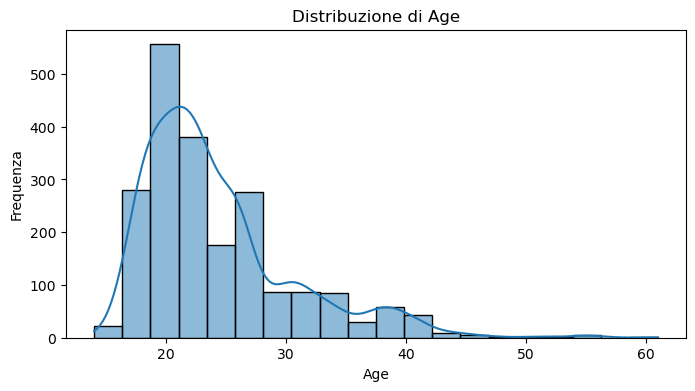

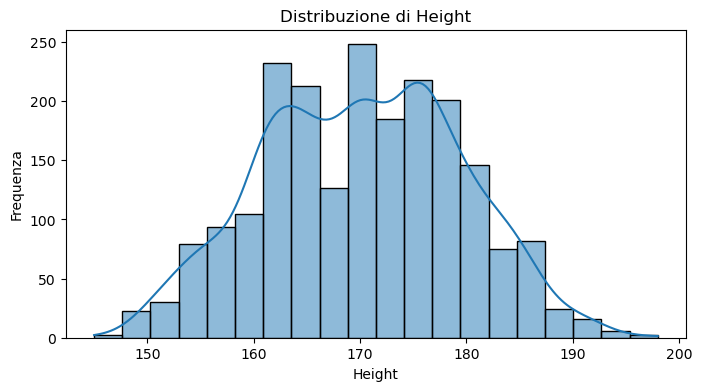

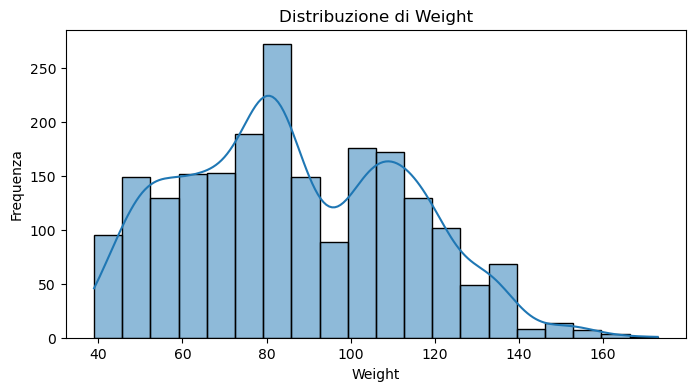

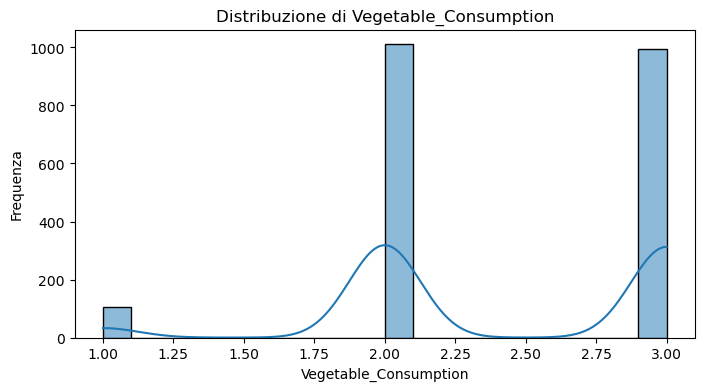

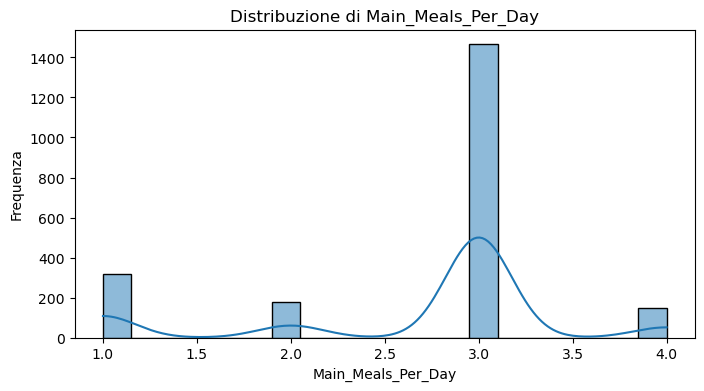

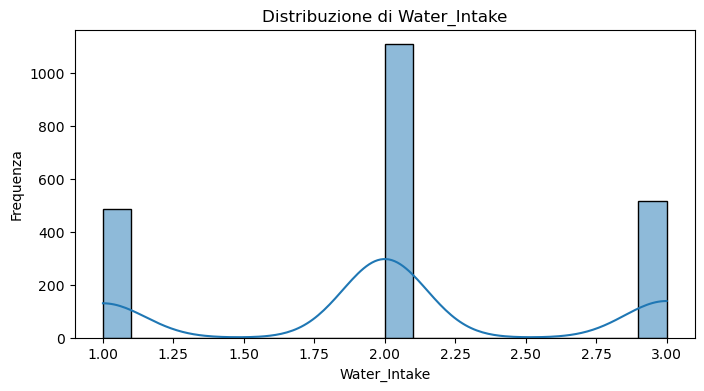

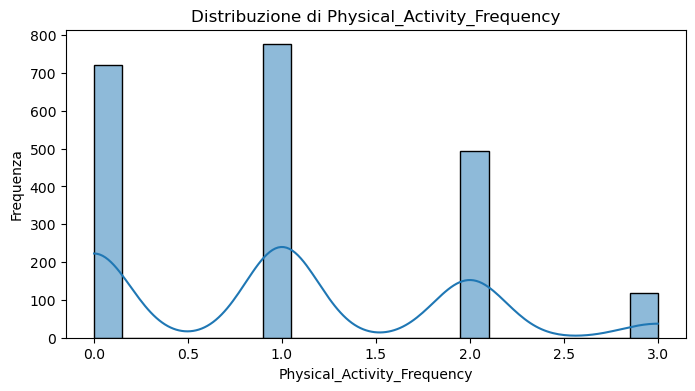

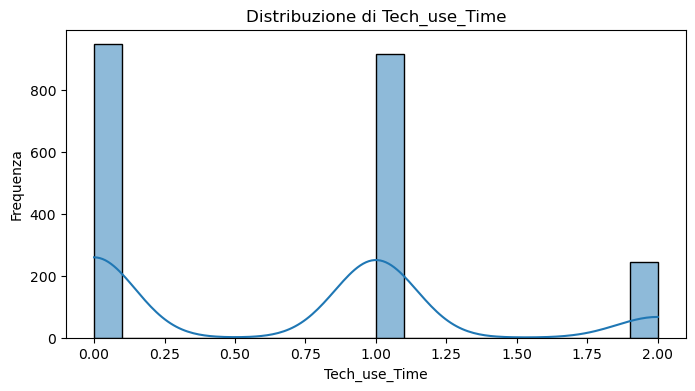

In [13]:
print("\n Distribuzioni delle variabili numeriche: \n")
print("\n Istogrammi: \n")
for var in var_numeriche:
    plt.figure(figsize=(8,4))
    sns.histplot(dataset_clean[var], kde=True, bins=20)
    plt.title(f"Distribuzione di {var}")
    plt.xlabel(var)
    plt.ylabel("Frequenza")
    plt.show()


 Boxplot: 



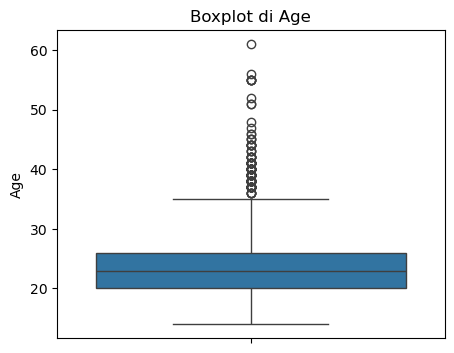

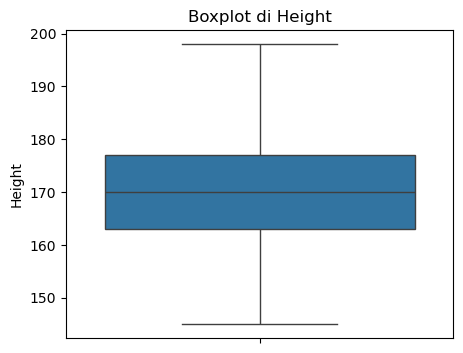

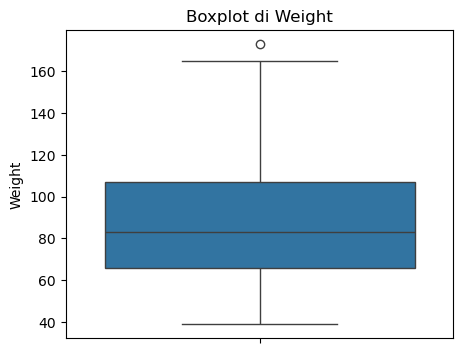

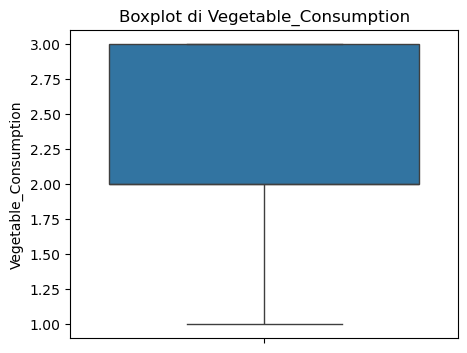

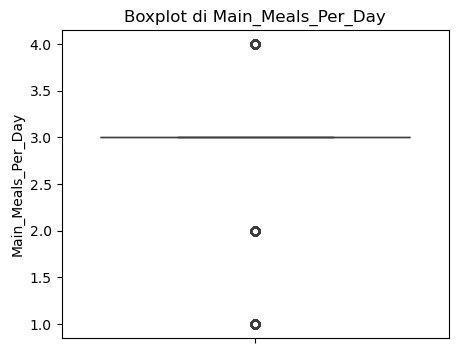

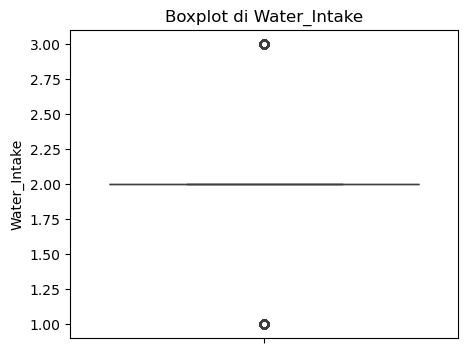

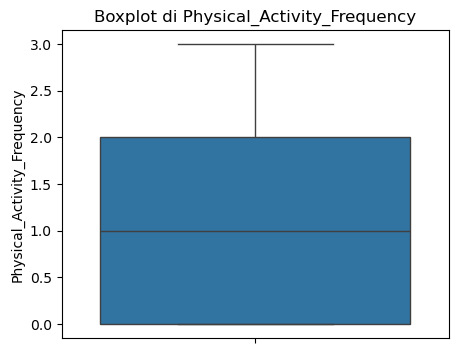

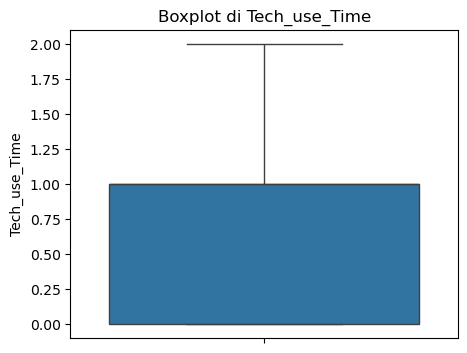

In [14]:
print("\n Boxplot: \n")
for var in var_numeriche:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=dataset_clean[var])
    #plt.boxplot(dataset_clean[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), medianprops=dict(color='red', linewidth=2))
    plt.title(f"Boxplot di {var}")
    plt.ylabel(var)
    plt.show()


 Distribuzioni delle variabili categoriche: 



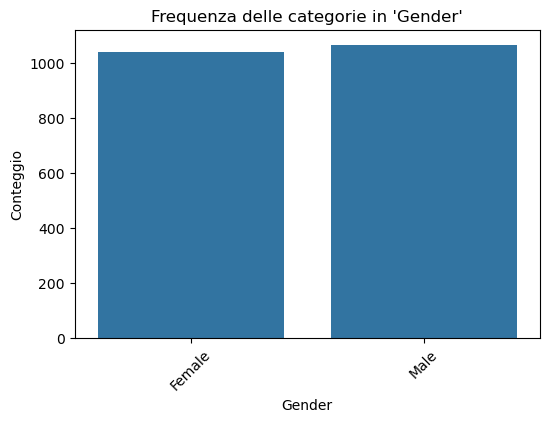

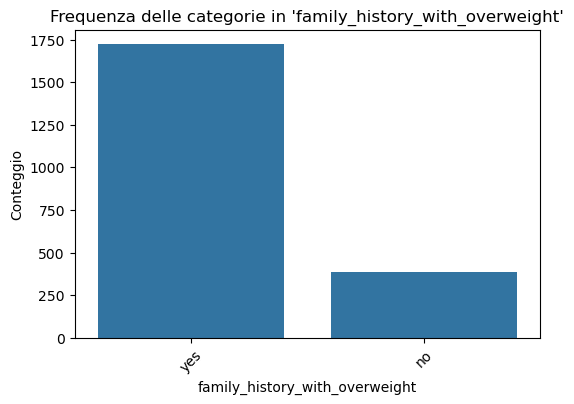

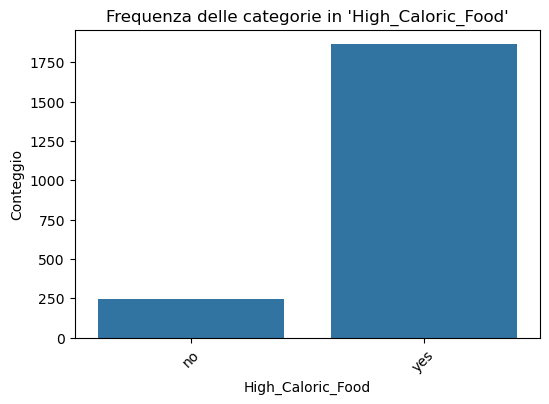

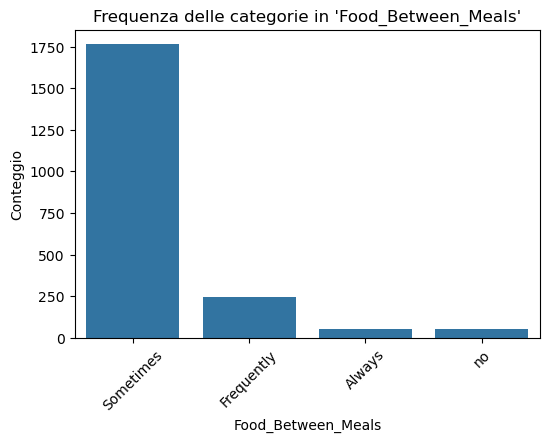

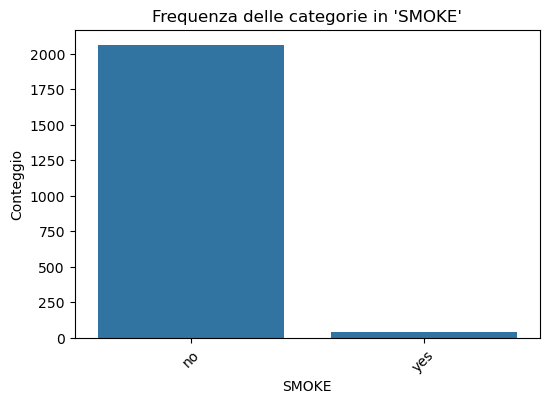

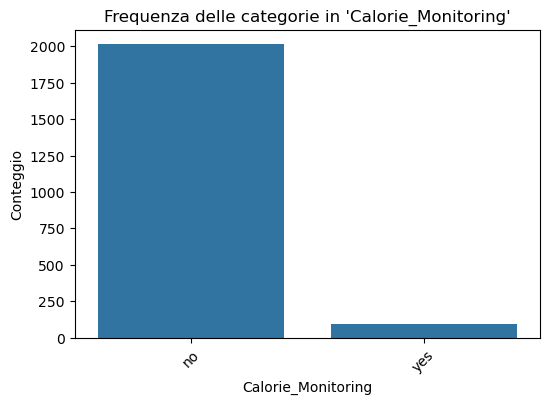

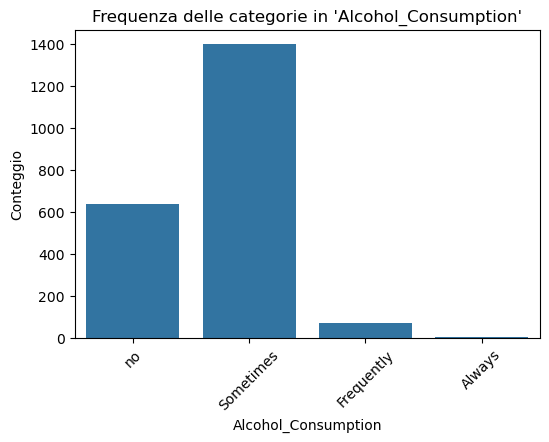

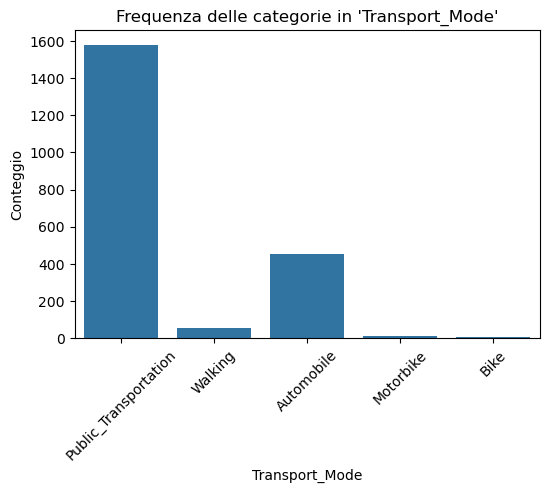

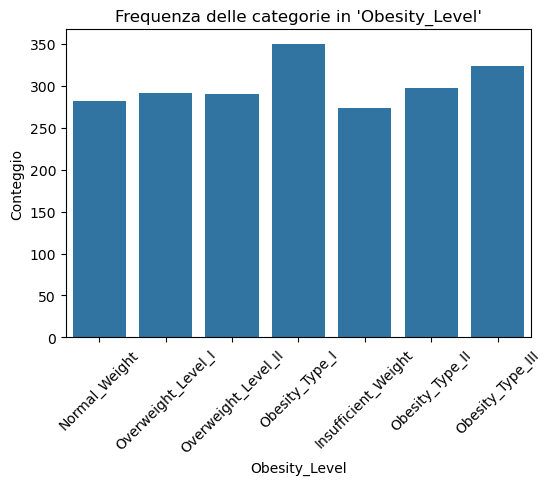

In [15]:
print("\n Distribuzioni delle variabili categoriche: \n")
for var in var_categoriche:
    plt.figure(figsize=(6,4))
    sns.countplot(x=dataset_clean[var])
    plt.title(f"Frequenza delle categorie in '{var}'")
    plt.xlabel(var)
    plt.ylabel("Conteggio")
    plt.xticks(rotation=45)
    plt.show()

In [16]:
print("\n Correlation matrix:")
corr_matrix = dataset_clean[var_numeriche].corr()
display(corr_matrix)



 Correlation matrix:


,Age,Height,Weight,Vegetable_Consumption,Main_Meals_Per_Day,Water_Intake,Physical_Activity_Frequency,Tech_use_Time
Age,1.000000,-0.024472,0.205404,0.005448,-0.044218,-0.023532,-0.135487,-0.286577
Height,-0.024472,1.000000,0.461006,-0.052556,0.245038,0.181219,0.290934,0.055679
Weight,0.205404,0.461006,1.000000,0.182530,0.103514,0.185917,-0.048198,-0.042439
Vegetable_Consumption,0.005448,-0.052556,0.182530,1.000000,0.008497,0.062980,0.013910,-0.075916
Main_Meals_Per_Day,-0.044218,0.245038,0.103514,0.008497,1.000000,0.063744,0.129107,0.014118
Water_Intake,-0.023532,0.181219,0.185917,0.062980,0.063744,1.000000,0.119169,-0.029973
Physical_Activity_Frequency,-0.135487,0.290934,-0.048198,0.013910,0.129107,0.119169,1.000000,0.056380
Tech_use_Time,-0.286577,0.055679,-0.042439,-0.075916,0.014118,-0.029973,0.056380,1.000000


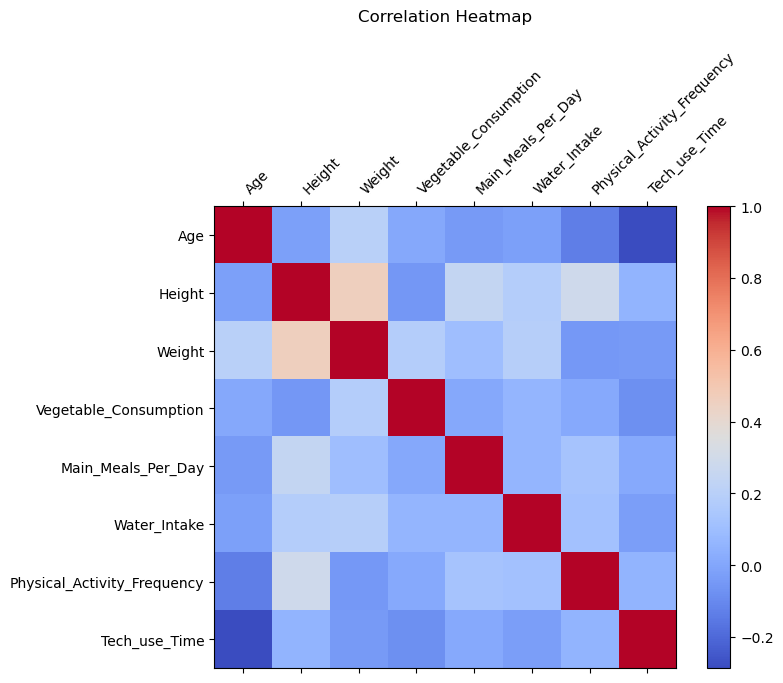

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
fig.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

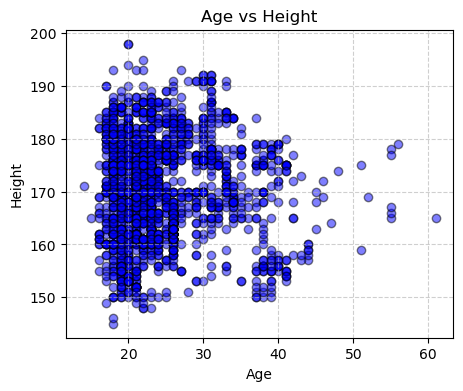

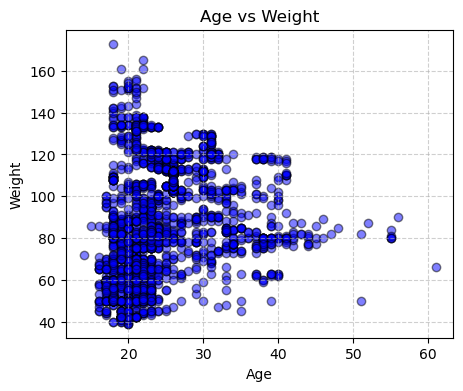

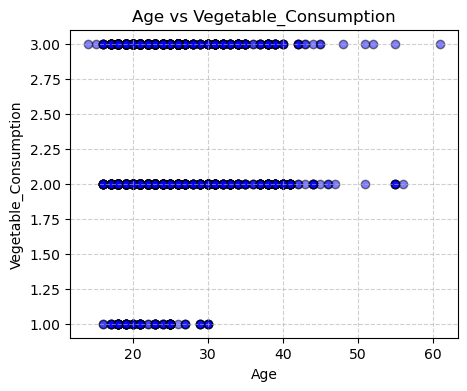

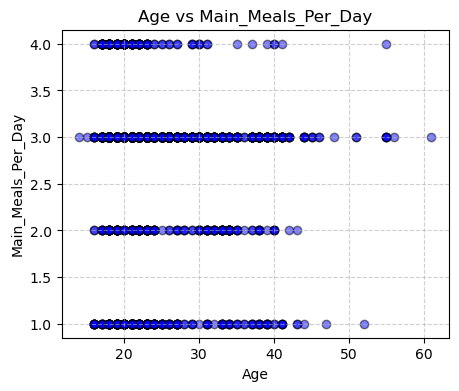

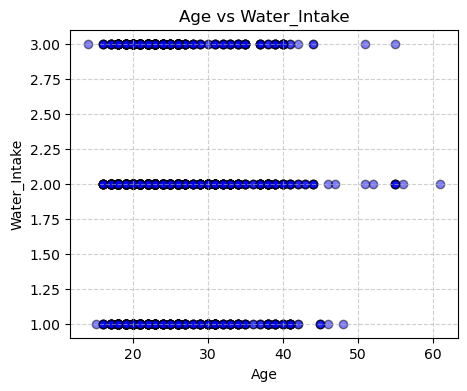

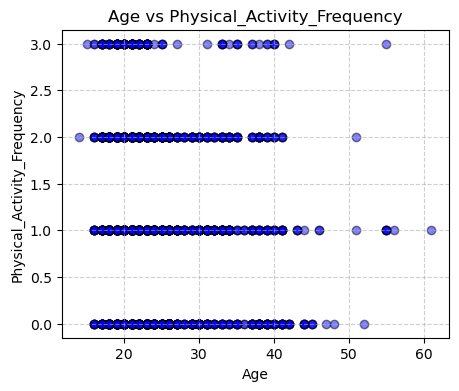

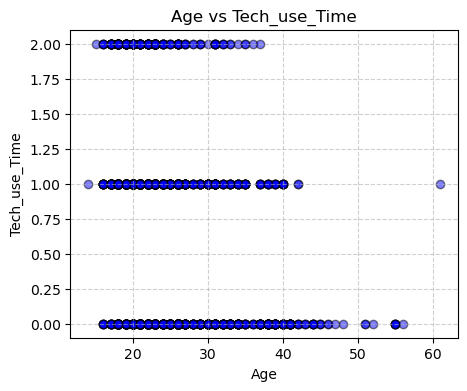

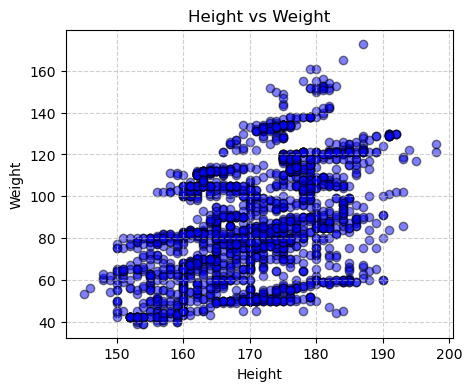

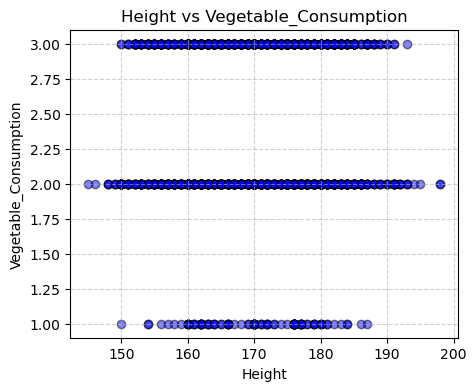

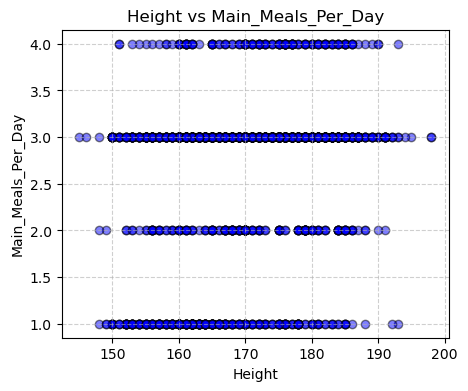

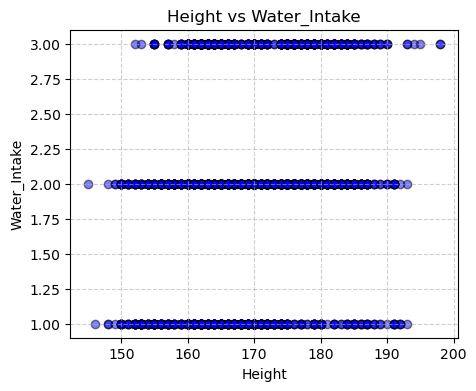

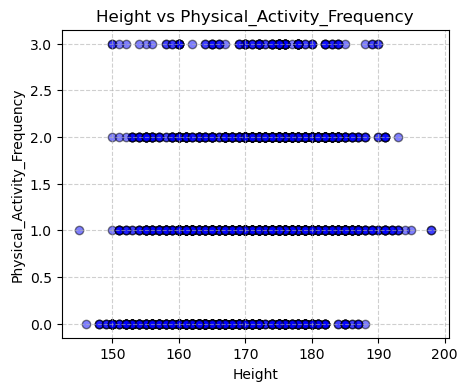

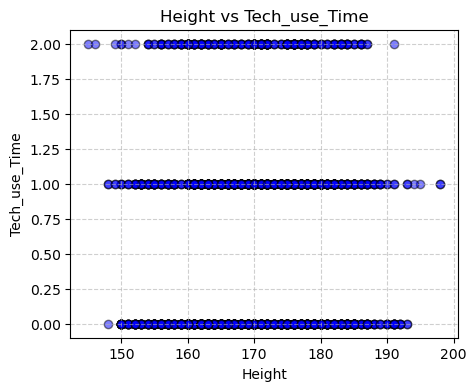

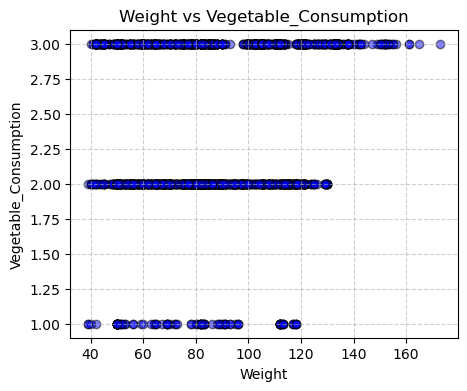

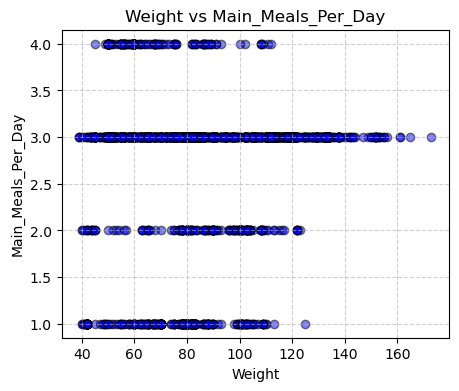

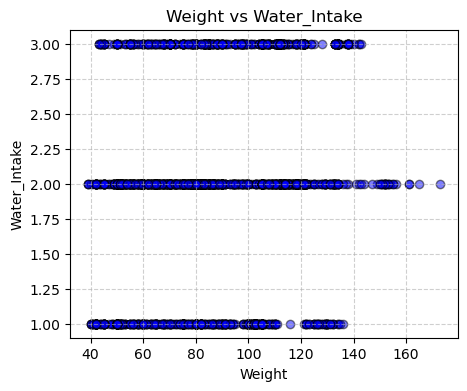

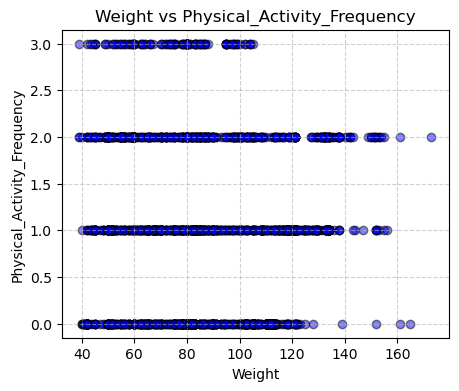

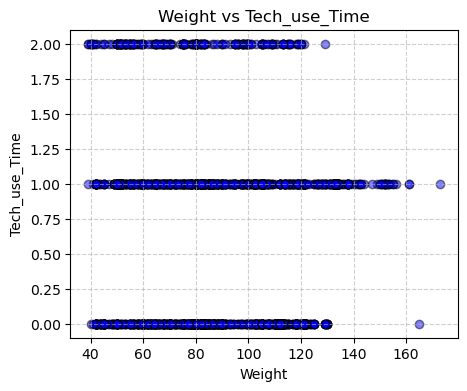

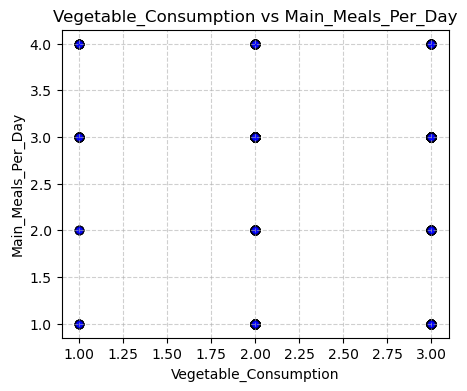

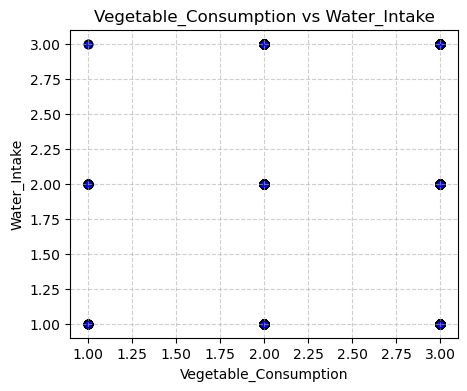

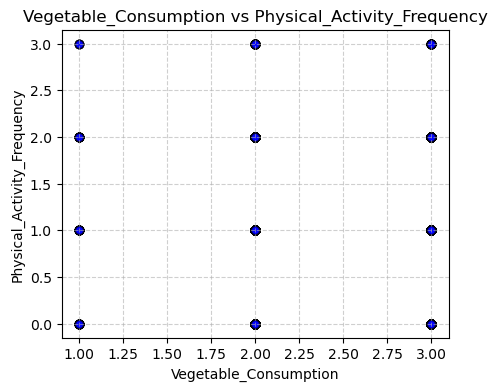

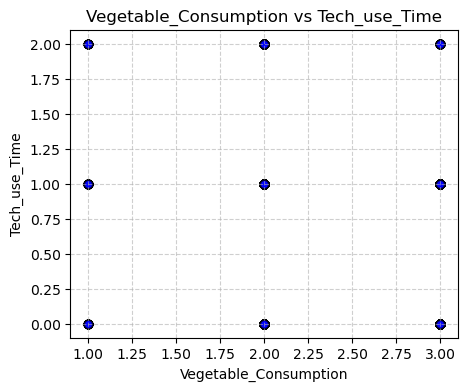

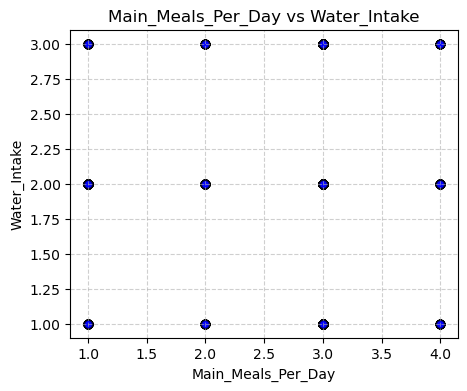

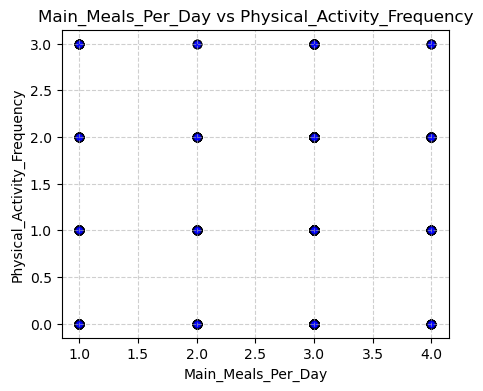

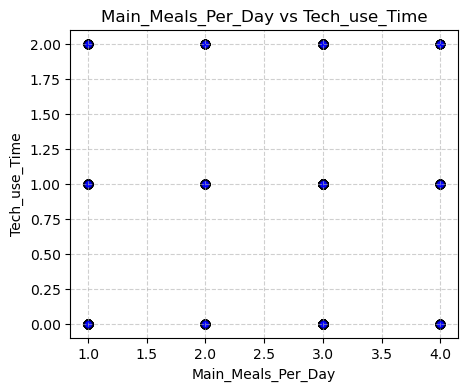

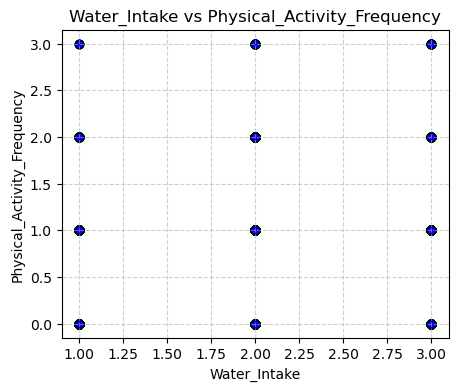

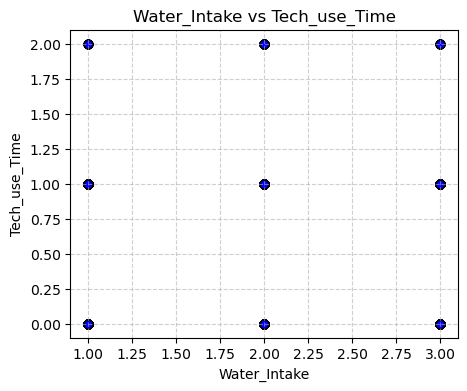

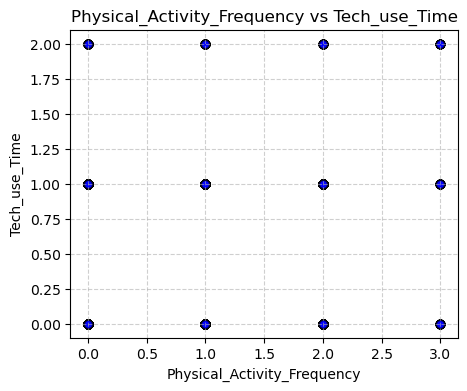

In [18]:
#Scatterplot per coppie di variabili numeriche
for i, var1 in enumerate(var_numeriche):
    for var2 in var_numeriche[i+1:]:
        plt.figure(figsize=(5,4))
        plt.scatter(dataset_clean[var1], dataset_clean[var2], alpha=0.5, color='blue', edgecolors='black')
        plt.title(f"{var1} vs {var2}")
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

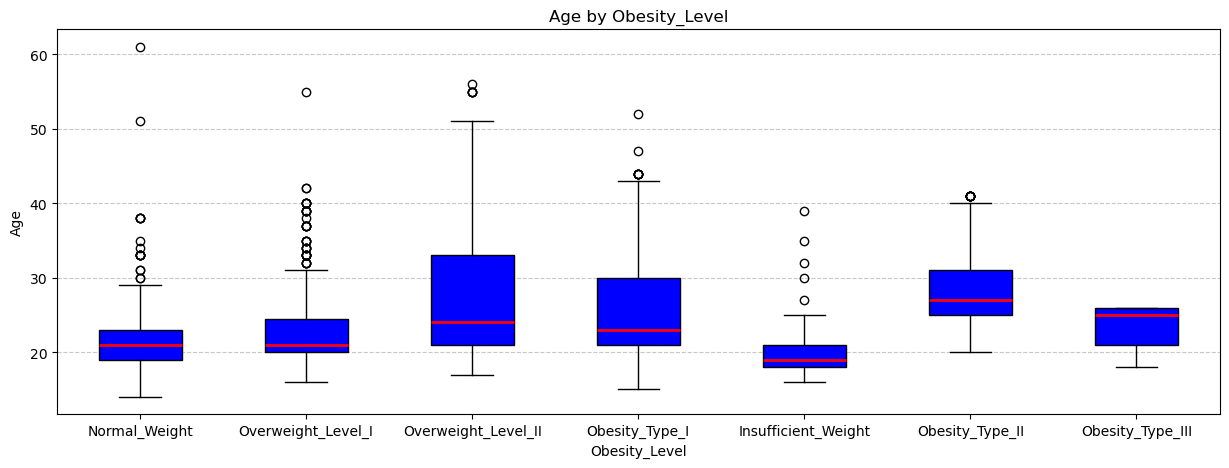

In [19]:
# Confronto di una variabile numerica rispetto a una categorica
# (Esempio: distribuzione dell'età per ciascun livello di obesità)
target = "Obesity_Level"  # nome della variabile target

if target in dataset_clean.columns:
    first_numvar = var_numeriche[0]  # prima variabile numerica
    categories = dataset_clean[target].unique()
    plt.figure(figsize=(15,5))
    data_to_plot = [dataset_clean[dataset_clean[target] == cat][first_numvar] for cat in categories]
    plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f"{first_numvar} by {target}")
    plt.xlabel(target)
    plt.ylabel(first_numvar)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [20]:
categorical_pairs = [(var_categoriche[i], var_categoriche[j])
                     for i in range(len(var_categoriche))
                         for j in range(i+1, len(var_categoriche))]

print("\nContingency tables:")
for var1, var2 in categorical_pairs:  
    print(f"\n{var1} vs {var2}")
    display(pd.crosstab(dataset_clean[var1], dataset_clean[var2]))


Contingency tables:

Gender vs family_history_with_overweight


family_history_with_overweight,no,yes
Gender,,
Female,233,808
Male,153,914



Gender vs High_Caloric_Food


High_Caloric_Food,no,yes
Gender,,
Female,143,898
Male,101,966



Gender vs Food_Between_Meals


Food_Between_Meals,Always,Frequently,Sometimes,no
Gender,,,,
Female,22,161,843,15
Male,30,81,920,36



Gender vs SMOKE


SMOKE,no,yes
Gender,,
Female,1027,14
Male,1038,29



Gender vs Calorie_Monitoring


Calorie_Monitoring,no,yes
Gender,,
Female,971,70
Male,1041,26



Gender vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
Gender,,,,
Female,0,28,710,303
Male,1,41,689,336



Gender vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
Gender,,,,,
Female,164,0,2,854,21
Male,291,7,9,725,35



Gender vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,175,137,156,2,323,145,103
Male,99,145,194,295,1,146,187



family_history_with_overweight vs High_Caloric_Food


High_Caloric_Food,no,yes
family_history_with_overweight,,
no,100,286
yes,144,1578



family_history_with_overweight vs Food_Between_Meals


Food_Between_Meals,Always,Frequently,Sometimes,no
family_history_with_overweight,,,,
no,19,114,220,33
yes,33,128,1543,18



family_history_with_overweight vs SMOKE


SMOKE,no,yes
family_history_with_overweight,,
no,380,6
yes,1685,37



family_history_with_overweight vs Calorie_Monitoring


Calorie_Monitoring,no,yes
family_history_with_overweight,,
no,337,49
yes,1675,47



family_history_with_overweight vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
family_history_with_overweight,,,,
no,0,15,267,104
yes,1,54,1132,535



family_history_with_overweight vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
family_history_with_overweight,,,,,
no,50,2,5,310,19
yes,405,5,6,1269,37



family_history_with_overweight vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,148,131,6,1,0,82,18
yes,126,151,344,296,324,209,272



High_Caloric_Food vs Food_Between_Meals


Food_Between_Meals,Always,Frequently,Sometimes,no
High_Caloric_Food,,,,
no,12,67,156,9
yes,40,175,1607,42



High_Caloric_Food vs SMOKE


SMOKE,no,yes
High_Caloric_Food,,
no,234,10
yes,1831,33



High_Caloric_Food vs Calorie_Monitoring


Calorie_Monitoring,no,yes
High_Caloric_Food,,
no,206,38
yes,1806,58



High_Caloric_Food vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
High_Caloric_Food,,,,
no,0,15,117,112
yes,1,54,1282,527



High_Caloric_Food vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
High_Caloric_Food,,,,,
no,36,4,3,175,26
yes,419,3,8,1404,30



High_Caloric_Food vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
High_Caloric_Food,,,,,,,
no,52,77,11,7,1,22,74
yes,222,205,339,290,323,269,216



Food_Between_Meals vs SMOKE


SMOKE,no,yes
Food_Between_Meals,,
Always,50,2
Frequently,233,9
Sometimes,1732,31
no,50,1



Food_Between_Meals vs Calorie_Monitoring


Calorie_Monitoring,no,yes
Food_Between_Meals,,
Always,44,8
Frequently,215,27
Sometimes,1709,54
no,44,7



Food_Between_Meals vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
Food_Between_Meals,,,,
Always,0,7,27,18
Frequently,1,16,120,105
Sometimes,0,44,1210,509
no,0,2,42,7



Food_Between_Meals vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
Food_Between_Meals,,,,,
Always,12,1,1,32,6
Frequently,25,0,5,201,11
Sometimes,415,6,5,1300,37
no,3,0,0,46,2



Food_Between_Meals vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Food_Between_Meals,,,,,,,
Always,2,34,6,2,0,5,3
Frequently,121,83,6,1,1,14,16
Sometimes,148,155,337,293,323,237,270
no,3,10,1,1,0,35,1



SMOKE vs Calorie_Monitoring


Calorie_Monitoring,no,yes
SMOKE,,
no,1974,91
yes,38,5



SMOKE vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
SMOKE,,,,
no,1,62,1369,633
yes,0,7,30,6



SMOKE vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
SMOKE,,,,,
no,444,7,10,1550,54
yes,11,0,1,29,2



SMOKE vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,273,270,344,282,323,288,285
yes,1,12,6,15,1,3,5



Calorie_Monitoring vs Alcohol_Consumption


Alcohol_Consumption,Always,Frequently,Sometimes,no
Calorie_Monitoring,,,,
no,1,61,1344,606
yes,0,8,55,33



Calorie_Monitoring vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
Calorie_Monitoring,,,,,
no,442,6,9,1505,50
yes,13,1,2,74,6



Calorie_Monitoring vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Calorie_Monitoring,,,,,,,
no,252,252,348,296,324,254,286
yes,22,30,2,1,0,37,4



Alcohol_Consumption vs Transport_Mode


Transport_Mode,Automobile,Bike,Motorbike,Public_Transportation,Walking
Alcohol_Consumption,,,,,
Always,0,0,0,0,1
Frequently,28,0,0,38,3
Sometimes,269,4,6,1091,29
no,158,3,5,450,23



Alcohol_Consumption vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Alcohol_Consumption,,,,,,,
Always,0,1,0,0,0,0,0
Frequently,1,18,13,2,0,16,19
Sometimes,156,157,172,224,323,224,143
no,117,106,165,71,1,51,128



Transport_Mode vs Obesity_Level


Obesity_Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Transport_Mode,,,,,,,
Automobile,46,43,109,95,1,67,94
Bike,0,4,0,1,0,2,0
Motorbike,0,6,3,0,0,1,1
Public_Transportation,222,197,236,200,323,212,189
Walking,6,32,2,1,0,9,6


## 4.1) 

In [21]:
dataset_clean = dataset_clean.copy()
bin_categoriche = ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'SMOKE', 'Calorie_Monitoring']
label_encoders = {}

for var in bin_categoriche:
    le = LabelEncoder()
    dataset_clean[var] = le.fit_transform(dataset_clean[var])
    label_encoders[var] = le
    print(f"{var}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
High_Caloric_Food: {'no': np.int64(0), 'yes': np.int64(1)}
SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Calorie_Monitoring: {'no': np.int64(0), 'yes': np.int64(1)}


In [22]:
multi_categoriche = ['Transport_Mode']
dataset_clean = pd.get_dummies(dataset_clean, columns=multi_categoriche, prefix=multi_categoriche, dtype = int)

print(f"\nDimensione dopo one-hot encoding: {dataset_clean.shape}")


Dimensione dopo one-hot encoding: (2108, 21)


In [23]:
# Variabili ORDINALI (hanno un ordine naturale)
var_ordinali = {
    'Food_Between_Meals': ['no', 'Sometimes', 'Frequently', 'Always'],
    'Alcohol_Consumption': ['no', 'Sometimes', 'Frequently', 'Always']
}

for var, order in var_ordinali.items():
    dataset_clean[var] = dataset_clean[var].astype('category')
    dataset_clean[var] = dataset_clean[var].cat.set_categories(order, ordered=True)
    dataset_clean[var] = dataset_clean[var].cat.codes
dataset_clean


,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,Vegetable_Consumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,...,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Obesity_Level,Transport_Mode_Automobile,Transport_Mode_Bike,Transport_Mode_Motorbike,Transport_Mode_Public_Transportation,Transport_Mode_Walking
0,0,21,162,64,1,0,2,3,1,0,...,0,0,1,0,Normal_Weight,0,0,0,1,0
1,0,21,152,56,1,0,3,3,1,1,...,1,3,0,1,Normal_Weight,0,0,0,1,0
2,1,23,180,77,1,0,2,3,1,0,...,0,2,1,2,Normal_Weight,0,0,0,1,0
3,1,27,180,87,0,0,3,3,1,0,...,0,2,0,2,Overweight_Level_I,0,0,0,0,1
4,1,22,178,90,0,0,2,1,1,0,...,0,0,0,1,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0,21,171,131,1,1,3,3,1,0,...,0,2,1,1,Obesity_Type_III,0,0,0,1,0
2110,0,22,175,134,1,1,3,3,1,0,...,0,1,1,1,Obesity_Type_III,0,0,0,1,0
2111,0,23,175,134,1,1,3,3,1,0,...,0,1,1,1,Obesity_Type_III,0,0,0,1,0
2112,0,24,174,133,1,1,3,3,1,0,...,0,1,1,1,Obesity_Type_III,0,0,0,1,0


In [24]:
# 4. SEPARAZIONE FEATURES E TARGET
print("\nPREPARAZIONE DATI PER PCA:")
var_target = "Obesity_Level"
# Features per PCA (escludiamo la target)
features_pca = [var for var in dataset_clean.columns if var != var_target]

X = dataset_clean[features_pca]
y = dataset_clean[var_target]  # Target originale

print(f"Numero di features per PCA: {len(features_pca)}")
print(f"Shape di X: {X.shape}")


PREPARAZIONE DATI PER PCA:
Numero di features per PCA: 20
Shape di X: (2108, 20)


In [25]:
#Standardizziamo le var numeriche

print("\nSCALING DELLE FEATURES:")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Statistiche prima dello scaling:")
print(pd.DataFrame(X, columns=features_pca).describe().loc[['mean', 'std']].round(2))
print("\n")
print("\nStatistiche dopo lo scaling:")
print(pd.DataFrame(X_scaled, columns=features_pca).describe().loc[['mean', 'std']].round(2))



SCALING DELLE FEATURES:
Statistiche prima dello scaling:
      Gender    Age  Height  Weight  family_history_with_overweight  \
mean    0.51  24.30  170.17   86.61                            0.82   
std     0.50   6.34    9.33   26.20                            0.39   

      High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
mean               0.88                   2.42                2.69   
std                0.32                   0.59                0.81   

      Food_Between_Meals  SMOKE  Water_Intake  Calorie_Monitoring  \
mean                1.14   0.02          2.02                0.05   
std                 0.47   0.14          0.69                0.21   

      Physical_Activity_Frequency  Tech_use_Time  Alcohol_Consumption  \
mean                         1.01           0.67                 0.73   
std                          0.90           0.67                 0.52   

      Transport_Mode_Automobile  Transport_Mode_Bike  \
mean                       0.22  

In [26]:
print("\nANALISI COMPONENTI PRINCIPALI (PCA):")

# PCA per tutte le componenti
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Analisi della varianza spiegata
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza spiegata per componente:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({cum_var:.4f} cumulativa)")


ANALISI COMPONENTI PRINCIPALI (PCA):
Varianza spiegata per componente:
PC1: 0.1383 (0.1383 cumulativa)
PC2: 0.1140 (0.2523 cumulativa)
PC3: 0.0897 (0.3420 cumulativa)
PC4: 0.0670 (0.4090 cumulativa)
PC5: 0.0568 (0.4659 cumulativa)
PC6: 0.0549 (0.5208 cumulativa)
PC7: 0.0522 (0.5730 cumulativa)
PC8: 0.0509 (0.6239 cumulativa)
PC9: 0.0494 (0.6732 cumulativa)
PC10: 0.0473 (0.7205 cumulativa)
PC11: 0.0446 (0.7651 cumulativa)
PC12: 0.0422 (0.8073 cumulativa)
PC13: 0.0393 (0.8466 cumulativa)
PC14: 0.0380 (0.8847 cumulativa)
PC15: 0.0340 (0.9187 cumulativa)
PC16: 0.0309 (0.9496 cumulativa)
PC17: 0.0213 (0.9709 cumulativa)
PC18: 0.0181 (0.9890 cumulativa)
PC19: 0.0110 (1.0000 cumulativa)
PC20: 0.0000 (1.0000 cumulativa)


RISULTATO PRINCIPALE:
Per spiegare almeno l'80% della varianza servono 12 componenti principali
Varianza cumulativa con 12 componenti: 80.731%


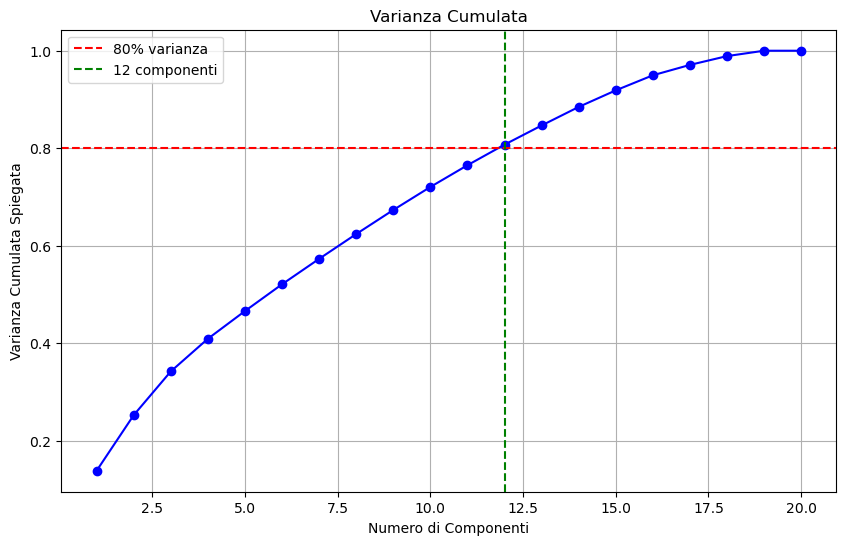

In [27]:
# Analisi dettagliata per l'80%
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"RISULTATO PRINCIPALE:")

print(f"Per spiegare almeno l'80% della varianza servono {n_components_80} componenti principali")
print(f"Varianza cumulativa con {n_components_80} componenti: {cumulative_variance[n_components_80-1]:.3%}")

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = dataset_clean.columns.tolist()
obesity_categories = dataset_clean["Obesity_Level"]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza')
plt.axvline(x=n_components_80, color='g', linestyle='--', label=f'{n_components_80} componenti')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Cumulata Spiegata')
plt.title('Varianza Cumulata')
plt.legend()
plt.grid(True)
plt.show()



Riduzione efficace: **-40%** dimensioni mantenendo **80%** informazione

Struttura bilanciata: Nessuna componente troppo dominante

Progressione regolare: Calo graduale della varianza

Dati informativi: Prime componenti spiegano varianza significativa

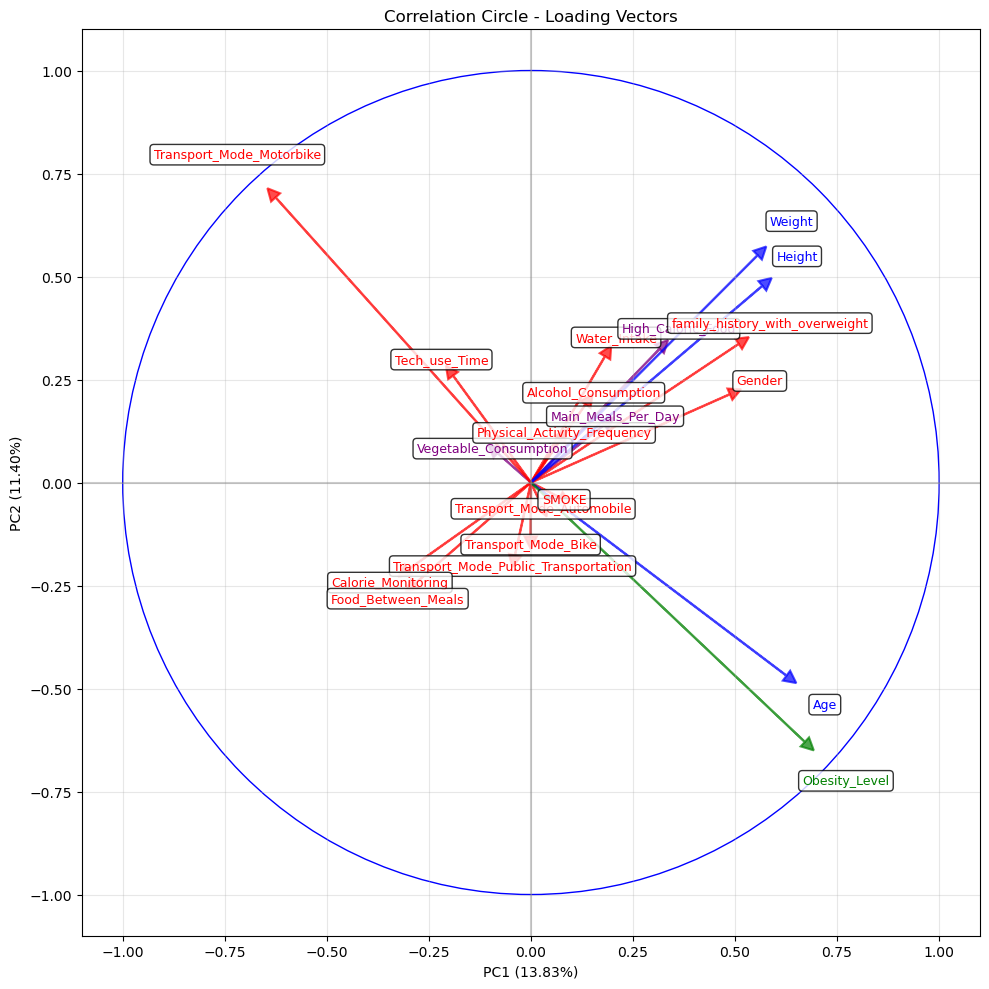

In [28]:
# ==========================
# 1) CORRELATION CIRCLE
# ==========================
plt.figure(figsize=(10,10))
ax = plt.gca()

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='-', alpha=1)
ax.add_artist(circle)

loading_magnitudes = np.sqrt(loadings[:, 0]**2 + loadings[:, 1]**2)
top_indices = np.argsort(loading_magnitudes)

# Plot loading vectors
for i in top_indices:
    x, y = loadings[i, 0], loadings[i, 1]
    feature_name = feature_names[i]
    
    # Color coding
    if any(metric in feature_name for metric in ['Weight', 'Height', 'Age']):
        color = 'blue'
    elif 'Obesity_Level' in feature_name:
        color = 'green'
    elif any(metric in feature_name for metric in ['High_Caloric_Food', 'Vegetable_Consumption', 'Main_Meals_Per_Day']):
        color = 'purple'
    else:
        color = 'red'
    
    ax.arrow(0, 0, x, y, color=color, alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.5)
    ax.text(x * 1.15, y * 1.15, feature_name, fontsize=9, ha='center', va='center', color=color,bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Ax settings
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axhline(0, color='gray', alpha=0.4)
ax.axvline(0, color='gray', alpha=0.4)
ax.set_title("Correlation Circle - Loading Vectors")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

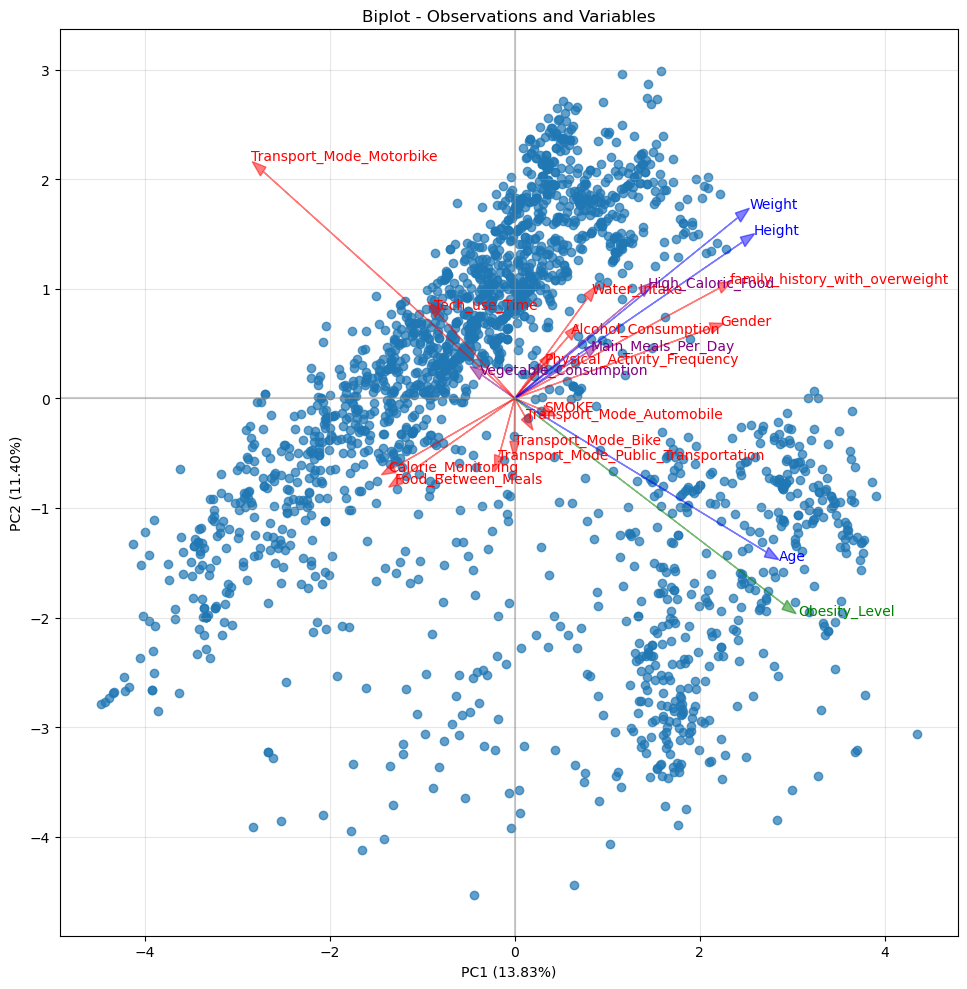

In [29]:
# ==========================
# 2) BIPLOT (OBSERVATIONS)
# ==========================
plt.figure(figsize=(10,10))
ax2 = plt.gca()

# Scatter plot of PCA scores (observations)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

# Add variable loading vectors on the same plot (optional)
for i in top_indices:
    x, y = loadings[i, 0] * max(X_pca[:,0]), loadings[i, 1] * max(X_pca[:,1])  # rescale loadings
    feature_name = feature_names[i]
    
    # Color coding
    if any(metric in feature_name for metric in ['Weight', 'Height', 'Age']):
        color = 'blue'
    elif 'Obesity_Level' in feature_name:
        color = 'green'
    elif any(metric in feature_name for metric in ['High_Caloric_Food', 'Vegetable_Consumption', 'Main_Meals_Per_Day']):
        color = 'purple'
    else:
        color = 'red'
    ax2.arrow(0, 0, x, y, color= color, alpha=0.5, head_width=0.1)
    ax2.text(x * 1.05, y * 1.05, feature_names[i], color= color)

ax2.set_title("Biplot - Observations and Variables")
ax2.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax2.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax2.axhline(0, color='gray', alpha=0.4)
ax2.axvline(0, color='gray', alpha=0.4)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### K-MEANS 

In [30]:
dataset_pca = pd.DataFrame(X_pca[:,:2], columns=['PC1', 'PC2'])
display(dataset_pca.head())

,PC1,PC2
0,-1.943402,-0.641929
1,-2.434553,-1.337080
2,-0.008624,0.977320
3,0.372038,-1.611621
4,-1.112858,-0.317927


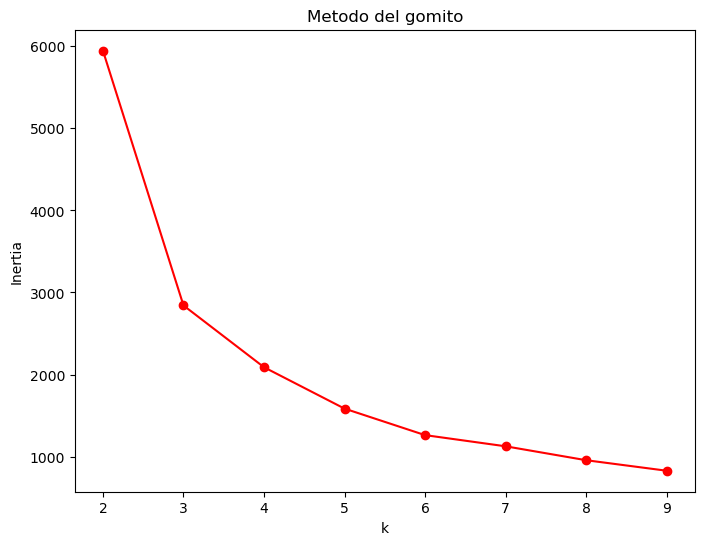

In [31]:
#METODO DEL GOMITO
inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, init = "k-means++", random_state=0)
    km.fit(dataset_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'ro-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metodo del gomito')
plt.show()


In [32]:
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(dataset_pca)
    silhouette_avg = silhouette_score(dataset_pca, labels)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5155770236543737
For n_clusters = 3 The average silhouette_score is : 0.5295958806182485
For n_clusters = 4 The average silhouette_score is : 0.4630586724672847
For n_clusters = 5 The average silhouette_score is : 0.4530511095972907
For n_clusters = 6 The average silhouette_score is : 0.43543596601069023
For n_clusters = 7 The average silhouette_score is : 0.4115344555208476
For n_clusters = 8 The average silhouette_score is : 0.4358018594729614
For n_clusters = 9 The average silhouette_score is : 0.4142623119136488


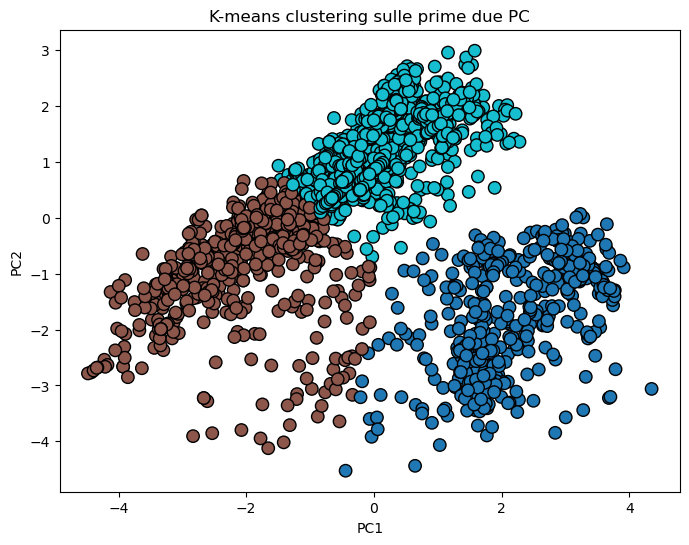

In [33]:
k = 3 # qui si forma il "gomito"

kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_pca[:, :2]) #solo le prime due componenti

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=80, cmap = "tab10",edgecolor='black', linewidth=1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering sulle prime due PC")
plt.show()

In [34]:
centroids = kmeans.cluster_centers_.T # coordinates of cluster
display(centroids)

array([[ 2.1699429 , -2.00829584,  0.10274113],
       [-1.75473126, -0.86732232,  1.18428023]])

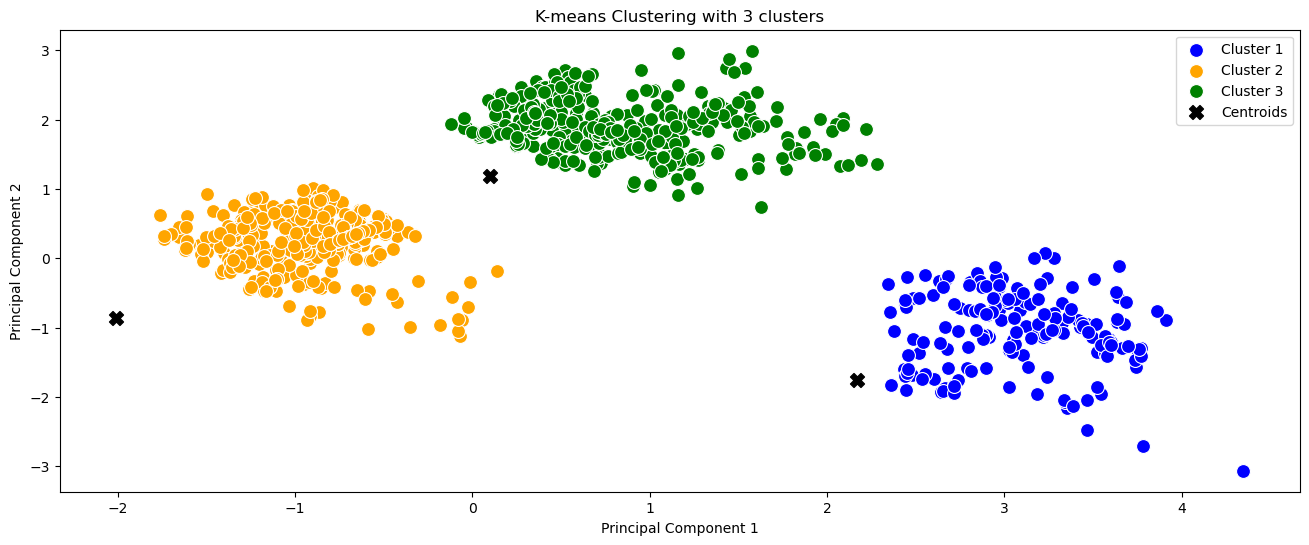

In [35]:
dataset_pca["clusters"] = labels

colors = ['blue', 'orange', 'green']

fig, ax = plt.subplots(figsize=(16, 6))

for k in range(0, 3):
    sns.scatterplot(x=dataset_pca['PC1'][dataset_pca.clusters == k], y=dataset_pca['PC2'][dataset_pca.clusters == k], color=colors[k], label='Cluster {}'.format(k+1), s=100)

ax.scatter(centroids[0][:], centroids[1][:], marker='X', s=100, color='black', label='Centroids')
ax.set_title('K-means Clustering with 3 clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.legend()
plt.show()

In [36]:
kmeans.inertia_

2842.129854706274